# Digital Signal Processing 101
This notebook aims to provide a high level overview of many fundamental digital signal processing (DSP) concepts. Much of the content in this notebook is derived from Rick Lyons book, "Understanding Digital Signal Processing" [1].

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

## Periodic Sampling

Periodic sampling is the process of representing a continuous signal with a sequence of equally spaced discrete data values. The time between each of the discrete values is known as the sample period, $T_s$, and the number of discrete values that are sampled in a second is known as the sample rate, $F_s.$ Illustrated below is a simulated continuous time 1 Hz sine wave that is sampled at a sample rate of 8 Hz.

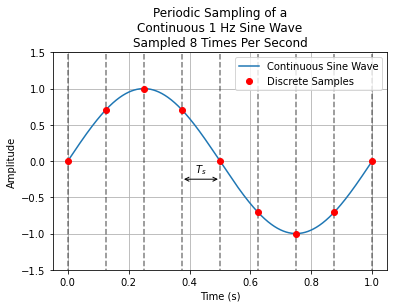

In [2]:
# Sinewave frequency
f = 1

# Set the discrete sample rate
Fs_disc = 8
Ts_disc = 1/Fs_disc

# Stop time
t_stop = 1

# Discrete time
t_disc = np.arange(0, t_stop + Ts_disc, Ts_disc)

# Discrete time sine waves
x_1hz_disc = np.sin(2 * np.pi * f * t_disc)

# Set a sample rate that is sufficiently high, such that it appears
# to be continuous for the frequencies we are analyzing
Fs_cont = 1000 * f
Ts_cont = 1/Fs_cont

# Simulated continuous time
t_cont = np.arange(0, t_stop, Ts_cont)

# Simulated continuous time sine waves
x_1hz_cont = np.sin(2 * np.pi * f * t_cont)

# Plot sample time vertical dotted lines
plt.plot(np.concatenate((t_disc, t_disc)).reshape(2, -1),
         np.array(((-2, 2),)*len(t_disc)).T, '--', c=(0, 0, 0, 0.5))

# Plot continuous and discrete sine waves
plt.plot(t_cont, x_1hz_cont, label='Continuous Sine Wave')
plt.plot(t_disc, x_1hz_disc, 'ro', label='Discrete Samples')

# Plot sample period arrow
sample_period_bar_idxs = [len(t_disc)//2 - 1, len(t_disc)//2]
x_sample_period_bar = t_disc[sample_period_bar_idxs]
y_sample_period_bar = (min(x_1hz_disc[sample_period_bar_idxs] - 0.25),)*2
plt.annotate('', xy=(x_sample_period_bar[0], y_sample_period_bar[0]),  xycoords='data',
             xytext=(x_sample_period_bar[1],
                     y_sample_period_bar[1]), textcoords='data',
             arrowprops=dict(arrowstyle='<->'))
plt.text(np.mean(x_sample_period_bar),
         y_sample_period_bar[0] + 0.1, '$T_s$', ha='center')

# Label and format plot
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Periodic Sampling of a\nContinuous {} Hz Sine Wave\nSampled {} Times Per Second'.format(f, Fs_disc))
plt.ylim((-1.5, 1.5))
plt.grid()
plt.legend()
pass

## Aliasing and the Nyquist Frequency

When we take discrete samples of a continuous signal, we lose some information about the original signal. This information loss creates some ambiguity as to what the original signal looked like before we sampled it. For a given set of samples, there are an infinite number of waveforms that could be drawn that pass through all of the data points. To better understand the issue at hand, consider a scenario where we have a sample rate of 5 Hz, and we are sampling a 1 Hz sine wave and a 6 Hz sine wave (illustrated below).

We can see that both the sine waves intersect at the exact time the samples are taken. This makes the 1 Hz sine wave and the 6 Hz sine wave indistinguishable from one another when sampling at a rate of 5 Hz. This phenomena is known *aliasing*. Signals are said to have *aliased* when they are sampled at a rate of $F_s$ and their frequency content lies outside of the *Nyquist window* $\left(0 \text{ to } \frac{F_s}{2} \right)$ Hz. $\frac{F_s}{2}$ is known as the *Nyquist frequency*. To determine which frequencies will alias to a specified frequency in the Nyquist window, the following relationship can be used:

$$f_a = f_0 + k \, F_s$$

where $k$ can be any positive or negative integer and $f_a$ is the aliased frequency that will show up within the Nyquist window at the frequency $f_0$ when sampled at a rate of $F_s$.

The frequency within the Nyquist window that a frequency outside of the Nyquist window will alias to can be determined with the following equation:

$$f_0 = f_a \, \% \, F_s$$

where $\%$ is the modulo operator.

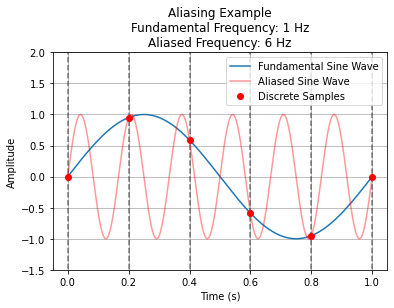

In [3]:
# Set the discrete sample rate
Fs_disc = 5
Ts_disc = 1/Fs_disc

# Sinewave frequency
f0 = 1

# Alias index
k = 1

# Alias frequency
f_alias = f0 + k * Fs_disc

# Stop time
t_stop = 1

# Discrete time
t_disc = np.arange(0, t_stop + Ts_disc, Ts_disc)

# Discrete time sine waves
x_1hz_disc = np.sin(2 * np.pi * f0 * t_disc)

# Set a sample rate that is sufficiently high, such that it appears
# to be continuous for the frequencies we are analyzing
Fs_cont = 1000 * f0
Ts_cont = 1/Fs_cont

# Simulated continuous time
t_cont = np.arange(0, t_stop, Ts_cont)

# Simulated continuous time sine waves
x_1hz_cont = np.sin(2 * np.pi * f0 * t_cont)
x_alias_cont = np.sin(2 * np.pi * f_alias * t_cont)

# Plot sample time vertical dotted lines
plt.plot(np.concatenate((t_disc, t_disc)).reshape(2, -1),
         np.array(((-2, 2),)*len(t_disc)).T, '--', c=(0, 0, 0, 0.5))

# Plot continuous and discrete sine waves
plt.plot(t_cont, x_1hz_cont, label='Fundamental Sine Wave')
plt.plot(t_cont, x_alias_cont, label='Aliased Sine Wave', c=(1, 0, 0, 0.4))
plt.plot(t_disc, x_1hz_disc, 'ro', label='Discrete Samples')

# Label and format plot
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Aliasing Example\nFundamental Frequency: {} Hz\nAliased Frequency: {} Hz'.format(f0, f_alias))
plt.ylim((-1.5, 2))
plt.grid()
plt.legend(loc='upper right')
pass

In [4]:
# Calculate the aliased frequency given a frequency and a sample rate
def f_alias(f, Fs):
    return f % Fs 

Fs = 5
f = 6
print('A frequency of {} Hz sampled at a rate of {} Hz aliases to a frequency of {} Hz.'.format(f, Fs, f_alias(f, Fs)))

A frequency of 6 Hz sampled at a rate of 5 Hz aliases to a frequency of 1 Hz.


## Discrete Fourier Transform 

The discrete Fourier transform (DFT) is a mathematical procedure used to determine the harmonic or frequency content in a discrete time signal sequence. The DFT originates from the continuous Fourier transform, $X(f)$, defined as follows:

$$X(f) = \int_{-\infty}^{\infty} x(t) e^{-j 2 \pi f t}\,dt \ $$

where $x(t)$ is some continuous time-domain signal. 
<br><br>
The DFT is defined as the discrete frequency-domain sequence, $X(m)$, defined as follows:

$$\begin{aligned}
X(m) & = \sum_{n=0}^{N-1} x(n) e^{-j \, 2 \pi \frac{n \, m}{N}} \quad \quad &\text{Exponential Form} \\
\\
X(m) & = \sum_{n=0}^{N-1} x(n) \left[cos \left( 2 \pi \, \frac{n \, m}{N} \right) \, - \, j \, sin \left(2 \pi \, \frac{n \, m}{N} \right) \right] \quad \quad &\text{Rectangular Form} \end{aligned}$$

where $x(n)$ is a discrete sequence of time-domain sampled values of the continuous variable $x(t)$, $e$ is th base of natural logarithms and $j=\sqrt{-1}$. The value of $N$ in the DFT equation determines the following things:
1. The number of input samples that are needed
1. The resolution of the frequency-domain results
1. The amount of processing time necessary to compute an N-point DFT

### DFT Concrete Example
In this concrete DFT example we will let $N=4$. The rectangular form of this DFT is:

$$X(m) = \sum_{n=0}^{3} x(n) \left[cos \left(2 \pi \, \frac{n \, m}{4} \right) \, - \, j \, sin \left(2 \pi \, \frac{n \, m}{4} \right) \right]$$
$$\bigg\downarrow$$
$$\begin{aligned}
X(0) = \quad & x(0) \, cos\left(2 \pi \, \frac{0 \cdot 0}{4}\right) \, - \, j \, x(0) \, sin\left(2 \pi \, \frac{0 \cdot 0}{4}\right) \\
+ \, & x(1) \, cos\left(2 \pi \, \frac{1 \cdot 0}{4}\right) \, - \, j \, x(1) \, sin\left(2 \pi \, \frac{1 \cdot 0}{4}\right) \\
+ \, & x(2) \, cos\left(2 \pi \, \frac{2 \cdot 0}{4}\right) \, - \, j \, x(2) \, sin\left(2 \pi \, \frac{2 \cdot 0}{4}\right) \\
+ \, & x(3) \, cos\left(2 \pi \, \frac{3 \cdot 0}{4}\right) \, - \, j \, x(3) \, sin\left(2 \pi \, \frac{3 \cdot 0}{4}\right) \\
\end{aligned}$$
$$\vdots$$
$$\begin{aligned}
X(1) = \quad & x(0) \, cos\left(2 \pi \, \frac{0 \cdot 1}{4}\right) \, - \, j \, x(0) \, sin\left(2 \pi \, \frac{0 \cdot 1}{4}\right) \\
+ \, & x(1) \, cos\left(2 \pi \, \frac{1 \cdot 1}{4}\right) \, - \, j \, x(1) \, sin\left(2 \pi \, \frac{1 \cdot 1}{4}\right) \\
+ \, & x(2) \, cos\left(2 \pi \, \frac{2 \cdot 1}{4}\right) \, - \, j \, x(2) \, sin\left(2 \pi \, \frac{2 \cdot 1}{4}\right) \\
+ \, & x(3) \, cos\left(2 \pi \, \frac{3 \cdot 1}{4}\right) \, - \, j \, x(3) \, sin\left(2 \pi \, \frac{3 \cdot 1}{4}\right) \\
\end{aligned}$$
$$\vdots$$
$$\begin{aligned}
X(2) = \quad & x(0) \, cos\left(2 \pi \, \frac{0 \cdot 2}{4}\right) \, - \, j \, x(0) \, sin\left(2 \pi \, \frac{0 \cdot 2}{4}\right) \\
+ \, & x(1) \, cos\left(2 \pi \, \frac{1 \cdot 2}{4}\right) \, - \, j \, x(1) \, sin\left(2 \pi \, \frac{1 \cdot 2}{4}\right) \\
+ \, & x(2) \, cos\left(2 \pi \, \frac{2 \cdot 2}{4}\right) \, - \, j \, x(2) \, sin\left(2 \pi \, \frac{2 \cdot 2}{4}\right) \\
+ \, & x(3) \, cos\left(2 \pi \, \frac{3 \cdot 2}{4}\right) \, - \, j \, x(3) \, sin\left(2 \pi \, \frac{3 \cdot 2}{4}\right) \\
\end{aligned}$$
$$\vdots$$
$$\begin{aligned}
X(3) = \quad & x(0) \, cos\left(2 \pi \, \frac{0 \cdot 3}{4}\right) \, - \, j \, x(0) \, sin\left(2 \pi \, \frac{0 \cdot 3}{4}\right) \\
+ \, & x(1) \, cos\left(2 \pi \, \frac{1 \cdot 3}{4}\right) \, - \, j \, x(1) \, sin\left(2 \pi \, \frac{1 \cdot 3}{4}\right) \\
+ \, & x(2) \, cos\left(2 \pi \, \frac{2 \cdot 3}{4}\right) \, - \, j \, x(2) \, sin\left(2 \pi \, \frac{2 \cdot 3}{4}\right) \\
+ \, & x(3) \, cos\left(2 \pi \, \frac{3 \cdot 3}{4}\right) \, - \, j \, x(3) \, sin\left(2 \pi \, \frac{3 \cdot 3}{4}\right) \\
\end{aligned}$$

This process is illustrated in more detail in the code below. Feel free to adjust the input to see how the DFT calculation changes.

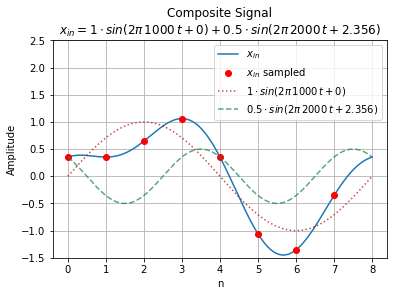

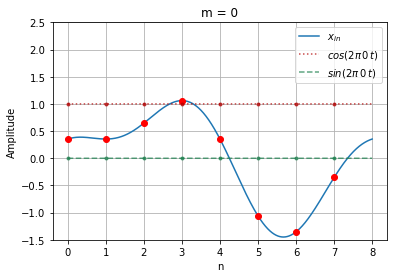

X(0) = (0.354 * 1.0)     -j (0.354 * 0.0)
     + (0.354 * 1.0)     -j (0.354 * 0.0)
     + (0.646 * 1.0)     -j (0.646 * 0.0)
     + (1.061 * 1.0)     -j (1.061 * 0.0)
     + (0.354 * 1.0)     -j (0.354 * 0.0)
     + (-1.061 * 1.0)    -j (-1.061 * 0.0)
     + (-1.354 * 1.0)    -j (-1.354 * 0.0)
     + (-0.354 * 1.0)    -j (-0.354 * 0.0)

    ........................................................
     = 0.354   -j 0.0
     + 0.354   -j 0.0
     + 0.646   -j 0.0
     + 1.061   -j 0.0
     + 0.354   -j 0.0
     + -1.061  -j -0.0
     + -1.354  -j -0.0
     + -0.354  -j -0.0

    ........................................................
     = 0.0 - j 0.0

    ........................................................
     = 0.0 ∠ 0.0°


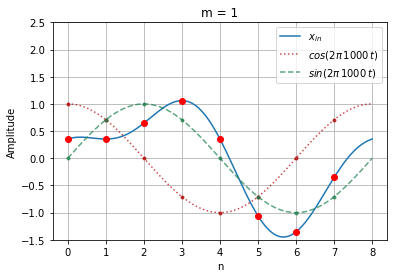

X(0) = (0.354 * 1.0)     -j (0.354 * 0.0)
     + (0.354 * 0.707)   -j (0.354 * 0.707)
     + (0.646 * 0.0)     -j (0.646 * 1.0)
     + (1.061 * -0.707)  -j (1.061 * 0.707)
     + (0.354 * -1.0)    -j (0.354 * 0.0)
     + (-1.061 * -0.707) -j (-1.061 * -0.707)
     + (-1.354 * -0.0)   -j (-1.354 * -1.0)
     + (-0.354 * 0.707)  -j (-0.354 * -0.707)

    ........................................................
     = 0.354   -j 0.0
     + 0.25    -j 0.25
     + 0.0     -j 0.646
     + -0.75   -j 0.75
     + -0.354  -j 0.0
     + 0.75    -j 0.75
     + 0.0     -j 1.354
     + -0.25   -j 0.25

    ........................................................
     = 0.0 - j -4.0

    ........................................................
     = 4.0 ∠ -90.0°


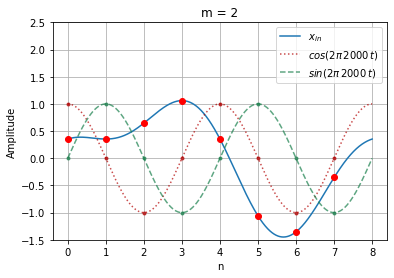

X(0) = (0.354 * 1.0)     -j (0.354 * 0.0)
     + (0.354 * 0.0)     -j (0.354 * 1.0)
     + (0.646 * -1.0)    -j (0.646 * 0.0)
     + (1.061 * -0.0)    -j (1.061 * -1.0)
     + (0.354 * 1.0)     -j (0.354 * -0.0)
     + (-1.061 * 0.0)    -j (-1.061 * 1.0)
     + (-1.354 * -1.0)   -j (-1.354 * 0.0)
     + (-0.354 * -0.0)   -j (-0.354 * -1.0)

    ........................................................
     = 0.354   -j 0.0
     + 0.0     -j 0.354
     + -0.646  -j 0.0
     + -0.0    -j -1.061
     + 0.354   -j -0.0
     + -0.0    -j -1.061
     + 1.354   -j -0.0
     + 0.0     -j 0.354

    ........................................................
     = 1.414 - j 1.414

    ........................................................
     = 2.0 ∠ 45.0°


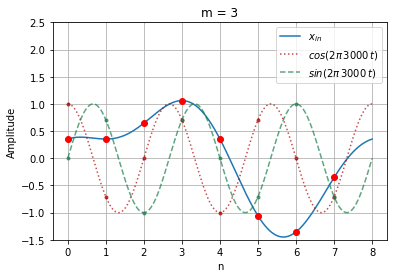

X(0) = (0.354 * 1.0)     -j (0.354 * 0.0)
     + (0.354 * -0.707)  -j (0.354 * 0.707)
     + (0.646 * -0.0)    -j (0.646 * -1.0)
     + (1.061 * 0.707)   -j (1.061 * 0.707)
     + (0.354 * -1.0)    -j (0.354 * 0.0)
     + (-1.061 * 0.707)  -j (-1.061 * -0.707)
     + (-1.354 * 0.0)    -j (-1.354 * 1.0)
     + (-0.354 * -0.707) -j (-0.354 * -0.707)

    ........................................................
     = 0.354   -j 0.0
     + -0.25   -j 0.25
     + -0.0    -j -0.646
     + 0.75    -j 0.75
     + -0.354  -j 0.0
     + -0.75   -j 0.75
     + -0.0    -j -1.354
     + 0.25    -j 0.25

    ........................................................
     = 0.0 - j 0.0

    ........................................................
     = 0.0 ∠ 0.0°


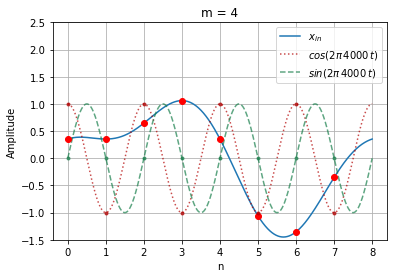

X(0) = (0.354 * 1.0)     -j (0.354 * 0.0)
     + (0.354 * -1.0)    -j (0.354 * 0.0)
     + (0.646 * 1.0)     -j (0.646 * -0.0)
     + (1.061 * -1.0)    -j (1.061 * 0.0)
     + (0.354 * 1.0)     -j (0.354 * -0.0)
     + (-1.061 * -1.0)   -j (-1.061 * 0.0)
     + (-1.354 * 1.0)    -j (-1.354 * -0.0)
     + (-0.354 * -1.0)   -j (-0.354 * 0.0)

    ........................................................
     = 0.354   -j 0.0
     + -0.354  -j 0.0
     + 0.646   -j -0.0
     + -1.061  -j 0.0
     + 0.354   -j -0.0
     + 1.061   -j -0.0
     + -1.354  -j 0.0
     + 0.354   -j -0.0

    ........................................................
     = 0.0 - j 0.0

    ........................................................
     = 0.0 ∠ 0.0°


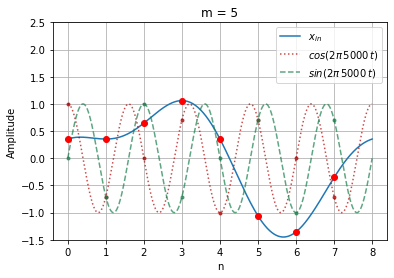

X(0) = (0.354 * 1.0)     -j (0.354 * 0.0)
     + (0.354 * -0.707)  -j (0.354 * -0.707)
     + (0.646 * 0.0)     -j (0.646 * 1.0)
     + (1.061 * 0.707)   -j (1.061 * -0.707)
     + (0.354 * -1.0)    -j (0.354 * 0.0)
     + (-1.061 * 0.707)  -j (-1.061 * 0.707)
     + (-1.354 * -0.0)   -j (-1.354 * -1.0)
     + (-0.354 * -0.707) -j (-0.354 * 0.707)

    ........................................................
     = 0.354   -j 0.0
     + -0.25   -j -0.25
     + 0.0     -j 0.646
     + 0.75    -j -0.75
     + -0.354  -j 0.0
     + -0.75   -j -0.75
     + 0.0     -j 1.354
     + 0.25    -j -0.25

    ........................................................
     = 0.0 - j 0.0

    ........................................................
     = 0.0 ∠ 0.0°


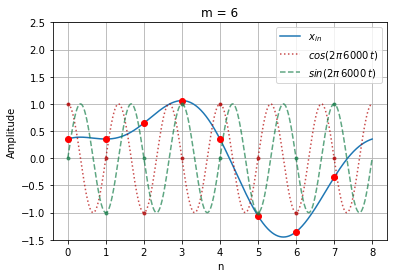

X(0) = (0.354 * 1.0)     -j (0.354 * 0.0)
     + (0.354 * -0.0)    -j (0.354 * -1.0)
     + (0.646 * -1.0)    -j (0.646 * 0.0)
     + (1.061 * 0.0)     -j (1.061 * 1.0)
     + (0.354 * 1.0)     -j (0.354 * -0.0)
     + (-1.061 * -0.0)   -j (-1.061 * -1.0)
     + (-1.354 * -1.0)   -j (-1.354 * 0.0)
     + (-0.354 * -0.0)   -j (-0.354 * 1.0)

    ........................................................
     = 0.354   -j 0.0
     + -0.0    -j -0.354
     + -0.646  -j 0.0
     + 0.0     -j 1.061
     + 0.354   -j -0.0
     + 0.0     -j 1.061
     + 1.354   -j -0.0
     + 0.0     -j -0.354

    ........................................................
     = 1.414 - j -1.414

    ........................................................
     = 2.0 ∠ -45.0°


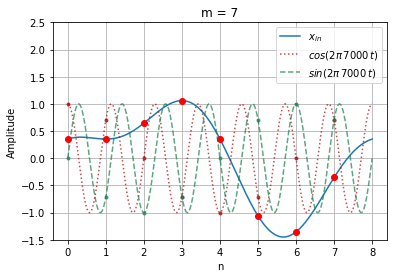

X(0) = (0.354 * 1.0)     -j (0.354 * 0.0)
     + (0.354 * 0.707)   -j (0.354 * -0.707)
     + (0.646 * -0.0)    -j (0.646 * -1.0)
     + (1.061 * -0.707)  -j (1.061 * -0.707)
     + (0.354 * -1.0)    -j (0.354 * 0.0)
     + (-1.061 * -0.707) -j (-1.061 * 0.707)
     + (-1.354 * -0.0)   -j (-1.354 * 1.0)
     + (-0.354 * 0.707)  -j (-0.354 * 0.707)

    ........................................................
     = 0.354   -j 0.0
     + 0.25    -j -0.25
     + -0.0    -j -0.646
     + -0.75   -j -0.75
     + -0.354  -j 0.0
     + 0.75    -j -0.75
     + 0.0     -j -1.354
     + -0.25   -j -0.25

    ........................................................
     = 0.0 - j 4.0

    ........................................................
     = 4.0 ∠ 90.0°


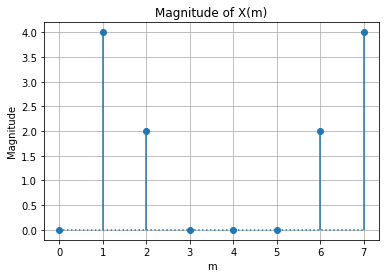

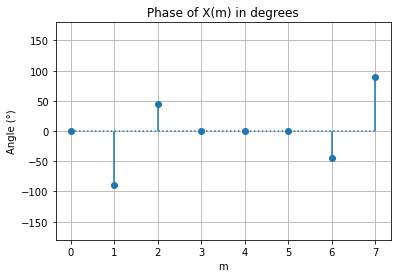

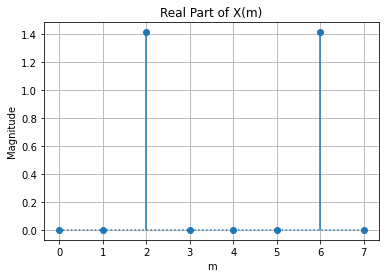

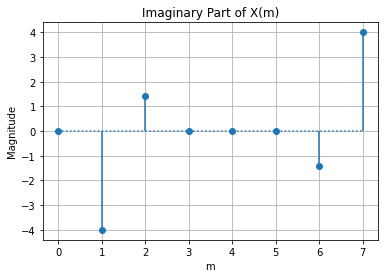

In [5]:
# Sample rate and period
Fs = 8e3
Ts = 1/Fs

# Number of samples to use in DFT calculation
N = 8
n = np.arange(0, N)

# Calculate the stop time
t_stop = N * Ts

# Signal parameters
A_1 = 1
f_1 = 1000
theta_1 = 0
A_2 = 0.5
f_2 = 2000
theta_2 = np.pi * 3 / 4

# Discrete signals
x_1 = A_1 * np.sin(2 * np.pi * f_1 * n * Ts + theta_1)
x_2 = A_2 * np.sin(2 * np.pi * f_2 * n * Ts + theta_2)
x_in = x_1 + x_2

# Simulate a continuous signal by setting the sample rate
# sufficiently higher than the discrete sample rate
Fs_cont = 1000 * Fs
Ts_cont = 1/Fs_cont
t_cont = np.arange(0, t_stop, Ts_cont)

# Continuous signals
x_1_cont = A_1 * np.sin(2 * np.pi * f_1 * t_cont + theta_1)
x_2_cont = A_2 * np.sin(2 * np.pi * f_2 * t_cont + theta_2)
x_in_cont = x_1_cont + x_2_cont

# Plot the composite input data as well as each part of the input data
fig_comp, ax_comp = plt.subplots()
ax_comp.grid()
ax_comp.plot(t_cont/Ts, x_in_cont, label='$x_{in}$')
ax_comp.plot(n, x_in, 'ro', label='$x_{in}$ sampled')
ax_comp.plot(t_cont/Ts, x_1_cont, ':', c=(0.7, 0, 0, 0.7),
             label='${} \cdot sin(2\pi\,{}\,t + {:.4g})$'.format(A_1, f_1, theta_1))
ax_comp.plot(t_cont/Ts, x_2_cont, '--', c=(0.1, 0.5, 0.3, 0.7),
             label='${} \cdot sin(2\pi\,{}\,t + {:.4g})$'.format(A_2, f_2, theta_2))

# Label and format the plot
ax_comp.set_ylim((-1.5, 2.5))
ax_comp.set_xlabel('n')
ax_comp.set_ylabel('Amplitude')
ax_comp.set_title('Composite Signal\n$x_{{in}} = {0} \cdot sin(2\pi\,{1}\,t + {2:.4g}) + {3} \cdot sin(2\pi\,{4}\,t + {5:.4g})$'.format(
    A_1, f_1, theta_1, A_2, f_2, theta_2))
ax_comp.legend(loc='upper right')

# Create a plot of each complex sinusoid that is used to 
# calculate the DFT and perform the DFT calculations
Xm_arr = np.empty(N, dtype=complex)
for m in range(N):
    # Generate the complex sinusoids
    cos_m = np.cos(2 * np.pi * n * m / N)
    sin_m = np.sin(2 * np.pi * n * m / N)
    cos_m_cont = np.cos(2 * np.pi * m * Fs / N * t_cont)
    sin_m_cont = np.sin(2 * np.pi * m * Fs / N * t_cont)

    # Plot the complex sinusoids along with the composite input singal
    fig, ax = plt.subplots()
    ax.grid()
    ax.plot(t_cont/Ts, x_in_cont, label='$x_{in}$')
    ax.plot(t_cont/Ts, cos_m_cont, ':', c=(0.7, 0, 0, 0.7),
            label='$cos(2 \pi \, {:.4g} \,t)$'.format(round(m*Fs/N, 3)))
    ax.plot(t_cont/Ts, sin_m_cont, '--', c=(0.1, 0.5, 0.3, 0.7),
            label='$sin(2 \pi \, {:.4g} \,t)$'.format(round(m*Fs/N, 3)))
    ax.plot(n, x_in, 'ro')
    ax.plot(n, cos_m, '.', c=(0.7, 0, 0, 0.7))
    ax.plot(n, sin_m, '.', c=(0.1, 0.5, 0.3, 0.7))

    # Label and format the plot
    ax.set_ylim((-1.5, 2.5))
    ax.set_xlabel('n')
    ax.set_ylabel('Amplitude')
    ax.set_title('m = {}'.format(m))
    ax.legend(loc='upper right')

    plt.show()

    # Step through each of the DFT calculations
    for k in range(N):
        real_str = '({} * {})'.format(round(x_in[k], 3), round(cos_m[k], 3))
        imag_str = 'j ({} * {})'.format(round(x_in[k], 3), round(sin_m[k], 3))
        if k == 0:
            print('X({}) = '.format(k), end='')
            print('{:18}-{}'.format(real_str, imag_str))
        else:
            print('     + {:18}-{}'.format(real_str, imag_str))

    print('\n    ........................................................')
    for k in range(N):
        real_str = '{}'.format(round(x_in[k] * cos_m[k], 3))
        imag_str = 'j {}'.format(round(x_in[k] * sin_m[k], 3))
        if k == 0:
            print('     = '.format(k), end='')
            print('{:8}-{}'.format(real_str, imag_str))
        else:
            print('     + {:8}-{}'.format(real_str, imag_str))

    print('\n    ........................................................')
    Xm_real = round(np.sum(x_in * cos_m), 3)
    Xm_imag = -round(np.sum(x_in * sin_m), 3)
    # Round -0.0 to 0.0 to ensure phase is calculated correctly
    if Xm_real == -0.0: Xm_real = 0.0 
    if Xm_imag == -0.0: Xm_imag = 0.0 
    print('     = {} - j {}'.format(Xm_real, Xm_imag))

    print('\n    ........................................................')
    Xm = complex(Xm_real, Xm_imag)
    Xm_arr[m] = Xm
    print('     = {} ∠ {}°'.format(
        round(np.abs(Xm), 3), round(np.angle(Xm, deg=True), 3)))

# Plot X(m) magnitude
fig_mag, ax_mag = plt.subplots()
ax_mag.grid()
ax_mag.stem(n, np.abs(Xm_arr), basefmt="C0:")
ax_mag.set_xlabel('m')
ax_mag.set_ylabel('Magnitude')
ax_mag.set_title('Magnitude of X(m)')

# Plot X(m) phase
fig_phase, ax_phase = plt.subplots()
ax_phase.grid()
ax_phase.stem(n, np.angle(Xm_arr, deg=True), basefmt="C0:")
ax_phase.set_xlabel('m')
ax_phase.set_ylabel('Angle (°)')
ax_phase.set_title('Phase of X(m) in degrees')
ax_phase.set_ylim((-180, 180))

# Plot X(m) real part
fig_real, ax_real = plt.subplots()
ax_real.grid()
ax_real.stem(n, np.real(Xm_arr), basefmt="C0:")
ax_real.set_xlabel('m')
ax_real.set_ylabel('Magnitude')
ax_real.set_title('Real Part of X(m)')

# Plot X(m) imaginary part
fig_imag, ax_imag = plt.subplots()
ax_imag.grid()
ax_imag.stem(n, np.imag(Xm_arr), basefmt="C0:")
ax_imag.set_xlabel('m')
ax_imag.set_ylabel('Magnitude')
ax_imag.set_title('Imaginary Part of X(m)')
pass

## DFT Symmetry

For a real valued input sequence, the complex DFT outputs will be symmetric about $m=\frac{N}{2}$. The real parts of the DFT output are *even symmetric* and the imaginary parts of the DFT output are *odd symmetric*. This means that the real DFT values on either side of $m=\frac{N}{2}$ have the same magnitude, but the imaginary DFT values on either side of $m=\frac{N}{2}$ have their signs flipped. The DFT magnitude is also *even symmetric* about $m=\frac{N}{2}$ and the phase is *odd symmetric* about $m=\frac{N}{2}$.

## DFT Linearity

The DFT has a property called *linearity* that states that the DFT of the sum of two signals is equal to the sum of the transforms of each signal. This allows us to take the DFT of signals that contain multiple different frequency components and we will arrive at the same result as if we took the DFT of each individual signal.

## DFT Magnitudes

The DFT output magnitudes are scaled by a factor of $N$, where $N$ is the length of the DFT. For a real input signal, the magnitude of the DFT output, $M_r$, will be equal to:

$$M_r = A_0 \, \frac{N}{2}$$

where $A_0$ is the amplitude of the real input signal.

For a complex input signal, the magnitude of the DFT output, $M_c$, will be equal to:

$$M_c = A_0 \, N$$

where $A_0$ is the magnitude of the complex input signal ($A_0 \, e^{j \, 2 \pi \, f \, n \, T_s}$).

## DFT Frequency Axis

The frequency that is associated with each value in $X(m)$ is a function of the sample rate, $F_s$. The formula to calculate the frequency for a given $m$ is:

$$f(m) = \frac{m \, F_s}{N}$$

## DFT Shifting Theorem

An important property of the DFT is known as the *shifting theorem*. This states that a shift in time of a periodic input sequencne manifests itself as a constant phase shift in the angles associated with the DFT results.

## Inverse DFT

The inverse discrete Fourier transform (IDFT) is a process that allows us to convert frequency-domain data back to the time-domain representation. The IDFT is defined by the following equations:

$$\begin{aligned}
x(n) & = \frac{1}{N} \sum_{m=0}^{N-1} X(m) e^{j \, 2 \pi \frac{m \, n}{N}} \quad \quad &\text{Exponential Form} \\
\\
x(n) & = \frac{1}{N} \sum_{m=0}^{N-1} X(m) \left[cos \left( 2 \pi \, \frac{m \, n}{N} \right) \, + \, j \, sin \left(2 \pi \, \frac{m \, n}{N} \right) \right] \quad \quad &\text{Rectangular Form} \end{aligned}$$

Notice that the two things that changed between the DFT and the IDFT equations are that:
1. The IDFT equation has a $\frac{1}{N}$ scale factor to normalize the gain incurred in the DFT.
1. The IDFT has the sign flipped in the exponent of the exponential form, and on the imaginary component in the rectangular form.

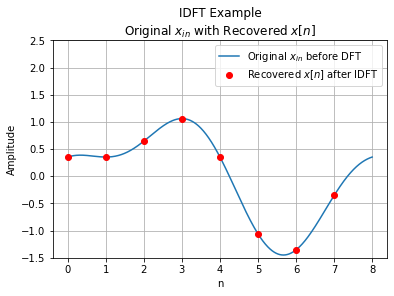

In [6]:
# Before running this cell, the DFT example code cell above must be run

# Perform the IDFT calculation
xn = np.zeros_like(x_in).astype(np.complex128)
for m in range(N):
    xn += Xm_arr[m] * (np.cos(2 * np.pi * m * n / N) + 1j * np.sin(2 * np.pi * m * n / N))
xn *= 1/N 
# Take only the real part of x[n]. The imaginary part cancels out after 
# performing the IDFT, and we need x[n] to be real to plot it
xn = np.real(xn)

# Overlay the recovered x[n] with the original input x_in
fig, ax = plt.subplots()
ax.grid()
ax.plot(t_cont/Ts, x_in_cont, label='Original $x_{in}$ before DFT')
ax.plot(n, xn, 'ro', label='Recovered $x[n]$ after IDFT')

# Label and format the plot
ax.set_ylim((-1.5, 2.5))
ax.set_xlabel('n')
ax.set_ylabel('Amplitude')
ax.set_title('IDFT Example\nOriginal $x_{in}$ with Recovered $x[n]$')
ax.legend(loc='upper right')
pass

## DFT Leakage

*Leakage* is a phenomena that occurs when the input sequence $x[n]$ contains frequencies other than the analytical frequencies associated with each *bin* of the DFT output. A *bin* simply refers to a single frequency-domain sample in the DFT output. The analytical frequencies of the DFT are:

$$f_{analysis} = \frac{m \, F_s}{N} \text{,  where } m = \text{0, 1, 2, ..., N-1}$$

When $x[n]$ contains frequencies other than the analytical frequencies, the energy from those frequencies *leak* into all of the other bins in the DFT output. This makes the DFT only an approximation of frequency content for real-world finite-length time sequences.

To better understand how leakage affects the amplitude response of the DFT output, we will analyze what happens when the DFT's input sequence is an arbitrary, real sinusoid. When the input sequence is an *N-point* cosine wave containing $k$ cycles (where k can be any real value, not just integers), the amplitude response of an *N-point* DFT bin in terms of the bin index $m$ is *approximated* by the sinc function:

$$X(m) = \frac{A_0 \, N}{2} \cdot \frac{sin\left[ \pi (k-m)\right]}{\pi (k-m)}$$

where $A_0$ is the peak value of the DFT's input sinusoid. An amplitude and magnitude plot for this sinc function is provided below.

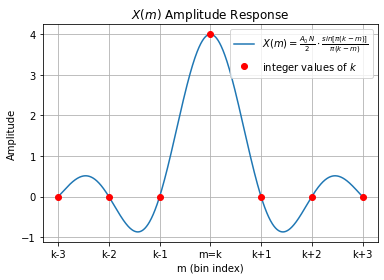

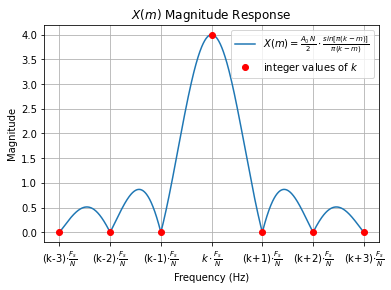

In [7]:
# Define sinc function parameters
A0 = 1
N = 8
m = 0
k_min = -3
k_max = 3
k_real = np.linspace(k_min, k_max, 1000)
k_int = np.arange(k_min, k_max+1)

# Calculate sinc function for both real values of k and integer values of k
Xm_real = (A0 * N / 2) * np.sin(np.pi * (k_real - m)) / (np.pi * (k_real - m))
Xm_int = (A0 * N / 2) * np.sin(np.pi * (k_int - m)) / (np.pi * (k_int - m))
# Set the X(0) index manually since sin(0)/sin(0) is not defined
Xm_int[np.abs(k_int - m).argmin()] = (A0 * N / 2) 

# Plot amplitude response of the sinc function as a function of the bin index
fig, ax = plt.subplots()
ax.grid()
ax.plot(k_real, Xm_real, label=r'$X(m) = \frac{A_0 \, N}{2} \cdot \frac{sin\left[ \pi (k-m)\right]}{\pi (k-m)}$')
ax.plot(k_int, Xm_int, 'ro', label='integer values of $k$')
ax.set_title('$X(m)$ Amplitude Response')
ax.set_xticks(k_int)
xticklabels = []
xticklabels += ['k-{}'.format(abs(k_int)) for k_int in range(k_min, 0)]
xticklabels += ['m=k']
xticklabels += ['k+{}'.format(k_int) for k_int in range(1, k_max+1)]
ax.set_xticklabels(xticklabels)
ax.set_xlabel('m (bin index)')
ax.set_ylabel('Amplitude')
ax.legend()

# Plot magnitude response of the sinc function as a function of frequency
fig, ax = plt.subplots()
ax.grid()
ax.plot(k_real, np.abs(Xm_real), label=r'$X(m) = \frac{A_0 \, N}{2} \cdot \frac{sin\left[ \pi (k-m)\right]}{\pi (k-m)}$')
ax.plot(k_int, Xm_int, 'ro', label='integer values of $k$')
ax.set_title('$X(m)$ Magnitude Response')
ax.set_xticks(k_int)
xticklabels = []
xticklabels += ['(k-{0})'.format(abs(k_int)) + r'$\cdot \frac{F_s}{N}$' for k_int in range(k_min, 0)]
xticklabels += [r'$k \cdot \frac{F_s}{N}$']
xticklabels += ['(k+{0})'.format(k_int) + r'$\cdot \frac{F_s}{N}$' for k_int in range(1, k_max+1)]
ax.set_xticklabels(xticklabels)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.legend()
pass

## DTFT of a Truncated Sinusoid to Better Understand Leakage

As stated above, the sinc function is only an *approximation* for the DFT response. As the input frequenecy moves further away from bin center this approximation loses accuracy. To understand the true nature of leakage across all frequencies, we can calculate the discrete-time Fourier transform (DTFT) of a truncated sinusoid. The DTFT is the continuous Fourier transform of an *N*-point discrete time-domain sequence, defined as:

$$X(\omega) = \sum_{n=-\infty}^{\infty} x[n] \, e^{-j \omega n}$$

The formula for a truncated sinusoid is:

$$sin\left(\frac{2 \pi \, k \, n}{N}  + \theta \right) \cdot \left( u[n] - u[n-N] \right)$$

where $k$ is the number of sinusoidal cycles that occur over $N$ samples, and $u[n]$ is the unit step function where:

$$u[n] = \begin{cases}
      0 \; : \; n \lt 0 \\
      1 \; : \; n \ge 0 \\
      \end{cases}$$

An illustration of the truncated sinusoid is provided below.

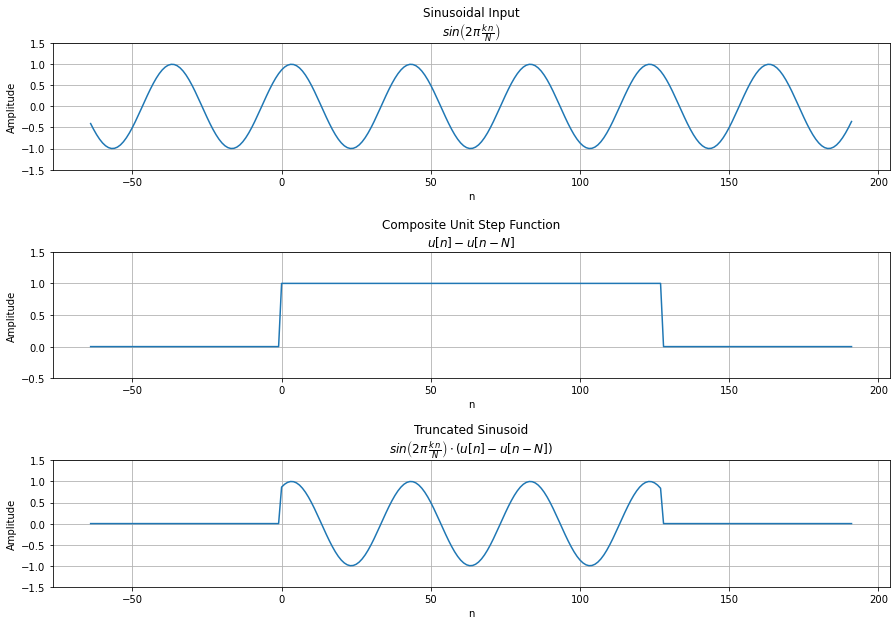

In [8]:
## Plot a truncated sinusoid

# Truncated sinusoid parameters
k = 3.2
N = 128
n = np.arange(-0.5*N, 1.5*N)
theta = np.pi/3

# Step function
def u(n): return np.heaviside(n, 1)

# Sinusoidal input
x_in = np.sin(2*np.pi*k*n/N + theta)

# Composite step function
u_comp = u(n) - u(n-N)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Plot sinusoidal input
ax[0].grid()
ax[0].plot(n, x_in)
ax[0].set_ylim((-1.5, 1.5))
ax[0].set_xlabel('n')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Sinusoidal Input\n' + r'$sin\left(2 \pi \, \frac{k \, n}{N} \right)$')

# Plot composite step function
ax[1].grid()
ax[1].plot(n, u_comp)
ax[1].set_ylim((-0.5, 1.5))
ax[1].set_xlabel('n')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Composite Unit Step Function\n$u[n] - u[n-N]$')

# Plot truncated sinusoid
ax[2].grid()
ax[2].plot(n, x_in * u_comp)
ax[2].set_ylim((-1.5, 1.5))
ax[2].set_xlabel('n')
ax[2].set_ylabel('Amplitude')
ax[2].set_title('Truncated Sinusoid\n' + r'$sin\left(2 \pi \, \frac{k \, n}{N} \right) \cdot \left( u[n] - u[n-N] \right)$')

plt.subplots_adjust(hspace=0.65)
pass

In order to calculate the DTFT of the truncated sinusoid, we can use a table of discrete-time Fourier transform pairs to find the following:

$$\begin{aligned}
  & \underline{\quad x[n] \quad } & \hspace{12em} & \underline{ \quad X(\omega) \quad } \\
  & \hspace{-1.9em} A_0 \, sin(\omega_0 n \, + \, \theta) & & \hspace{-6.5em} A_0 \, \frac{\pi}{j} \left[e^{j \theta} \delta (\omega - \omega_0) - e^{-j \theta} \delta (\omega + \omega_0) \right] , \quad -\pi \lt \omega \lt \pi \\
  & \hspace{-1.5em} u[n] \, - \, u[n - N] & & \hspace{-2.5em} e^{-j \omega \frac{N-1}{2}} \cdot \frac{sin\left( \frac{\omega}{2} N\right)}{sin\left( \frac{\omega}{2}\right)} \\
\end{aligned}$$

Looking at the table of discrete-time Fourier transform properties we see that:

$$\begin{aligned}
  & \underline{\quad \text{Property} \quad} & \hspace{3em} & \underline{\quad \text{Time Domain} \quad} & \hspace{3em} & \underline{\quad \text{DTFT Domain} \quad} \\
  & \text{Multiplication} & & \hspace{2.15em} a[n] \, b[n] & & \hspace{-1.5em} \frac{1}{2 \pi} \int_{-\pi}^{\pi} A(\phi) \, B(\omega - \phi) \, d \phi\\
\end{aligned}$$

Using the multiplication property of the DTFT with the truncated sinusoid we get:

$$
A_0 \, sin \left(\omega_0 n \, + \, \theta \right) \cdot \left(u[n] \, - \, u[n-N] \right) \\
\, \\
\Bigg\Downarrow \, \text{DTFT}\\ 
\, \\
X(\omega) = \, \frac{1}{2 \pi} \int_{-\pi}^{\pi} A(\phi) \, B(\omega - \phi) \, d \phi \\
\, \\
= \frac{1}{2 \pi} \int_{-\pi}^{\pi} \, \left[ A_0 \, \frac{\pi}{j} \left[e^{j \theta} \delta (\phi - \omega_0) - e^{-j \theta}\delta (\phi + \omega_0) \right] \cdot e^{-j (\omega - \phi) \frac{N-1}{2}} \cdot \frac{sin\left( \frac{(\omega - \phi)}{2} N\right)}{sin\left( \frac{(\omega - \phi)}{2}\right)} \right] \hspace{0.5em} d\phi \\
\, \\
= \frac{A_0}{2 j} \left[ e^{-j \left[ (\omega - \omega_0) \frac{N-1}{2} - \theta \right]} \cdot \frac{sin\left( \frac{(\omega - \omega_0)}{2} N\right)}{sin\left( \frac{(\omega - \omega_0)}{2}\right)} \, - \, e^{-j \left[ (\omega + \omega_0) \frac{N-1}{2} + \theta \right] } \cdot \frac{sin\left( \frac{(\omega + \omega_0)}{2} N\right)}{sin\left( \frac{(\omega + \omega_0)}{2}\right)} \right]
$$

Now we can let $\omega = m \frac{2 \pi}{N}$, where $m$ is the DFT bin index that we are interested in measuring the leakage at and we can let $\omega_0 = k \frac{2 \pi}{N}$, where $k$ is a real number representing the distance in bins that the input sinusoid is from $m$. Substituting these values into $X(\omega)$ and simplifying a bit we get:

$$
X(m) = \frac{A_0}{2 j} \left[ e^{-j \left[ (\pi (m - k) \frac{N-1}{N})  - \theta \right]} \cdot \frac{sin\left(\pi (k - m)\right)}{sin\left( \frac{1}{N} \pi (k - m) \right)} \, - \, e^{-j \left[ (\pi (m + k) \frac{N-1}{N})  + \theta \right] } \cdot \frac{sin\left(\pi (k + m)\right)}{sin\left( \frac{1}{N} \pi (k + m) \right)} \right]
$$

This equation $X(m)$ can be used to calculate the leakage for any sinusoidal input in bin $m$ of the DFT output. For a typical sinusoidal input, $k$ is related to the input frequency $f$ by the following equation:

$$k = f \frac{N}{F_s}$$

The example below calculates an *N*-point fast Fourier tansform (FFT), which is just an efficient implementation of the DFT, on a sinusoidal input with arbitrary phase and frequency. These DFT outputs are then superimposed on top of the DTFT of the input, $X(m)$, to illustrate how the signal energy gets spread out across multiple DFT bins. 

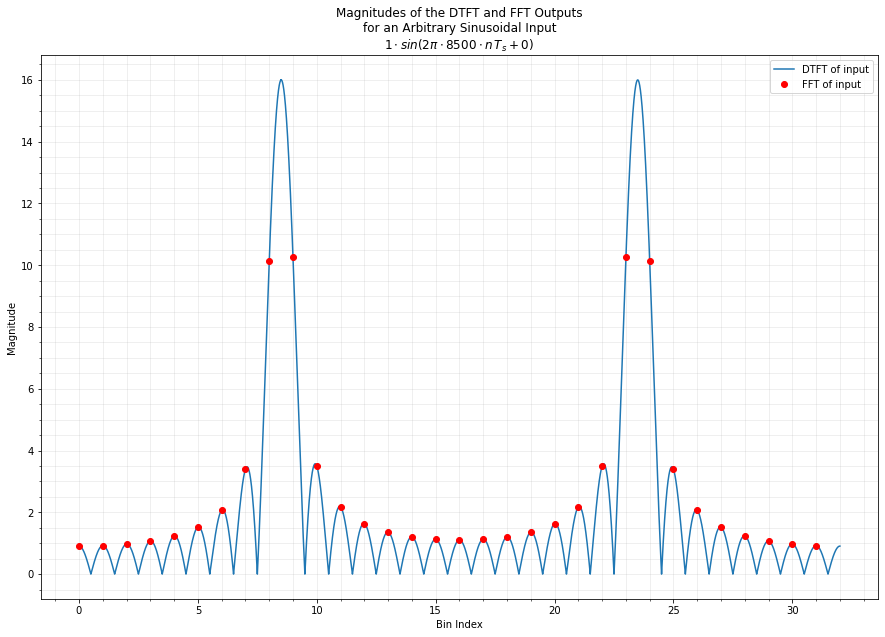

In [9]:
# Sample rate and sample period
Fs = 32e3
Ts = 1/Fs

# Number of DFT bins
N = 32

# Input parameters
A0 = 1
f = 8500
theta = 0
n = np.arange(0, N)

# Sinusoidal input data
x_in = A0 * np.sin(2 * np.pi * f * n * Ts + theta)

# Calculate the FFT (just an efficient form of the DFT)
x_fft = fft(x_in)

# Calculate the bin that the input frequency falls in
# Note that this will be real number that lies between two bins
# so long as N/Fs is not a multiple of f
k = f * N/Fs

# Range of bins to calculate X(m) over
# The step size is set sufficiently low to provide high resolution
# between the DFT bins
m = np.arange(0, N, 1e-4)

# Calculate the DTFT for the configured sinusoidal input
Xm = \
    A0/2j * (
        np.exp(-1j*(np.pi*(m-k)*(N-1)/N - theta)) *
        np.sin(np.pi*(k-m)) / np.sin(np.pi*(k-m)/N)
        - np.exp(-1j*(np.pi*(m+k)*(N-1)/N + theta)) *
        np.sin(np.pi*(k+m)) / np.sin(np.pi*(k+m)/N)
    )

# Plot the FFT and the DTFT of the sinusoidal input
fig, ax = plt.subplots(figsize=(15, 10))
ax.minorticks_on()
ax.grid(True, which='both', alpha=0.25)
ax.plot(m, np.abs(Xm), label='DTFT of input')
ax.plot(n, np.abs(x_fft), 'ro', label='FFT of input')
ax.set_xlabel('Bin Index')
ax.set_ylabel('Magnitude')
ax.set_title('Magnitudes of the DTFT and FFT Outputs\nfor an Arbitrary Sinusoidal Input\n' +
             '${} \cdot sin(2 \pi \cdot {} \cdot n \, T_s + {})$'.format(A0, f, theta))
ax.legend()
pass

# Citations
[1] Lyons, R. G. (2010). Understanding digital signal processing: United States edition (3rd ed.). Prentice Hall.